In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


In [9]:

# Paths to the training and validation datasets
val_dir = 'C:/Users/User/Desktop/ai project/dataset/validation'
train_dir = 'C:/Users/User/Desktop/ai project/dataset/train'

# Image parameters
img_height, img_width = 48, 48
batch_size = 32

# Create image data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 602 images belonging to 6 classes.
Found 121 images belonging to 6 classes.


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 423ms/step - accuracy: 0.1791 - loss: 1.8106 - val_accuracy: 0.1818 - val_loss: 1.7917
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.1485 - loss: 1.8058 - val_accuracy: 0.1570 - val_loss: 1.7916
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.1666 - loss: 1.7964 - val_accuracy: 0.1488 - val_loss: 1.7916
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.2053 - loss: 1.7900 - val_accuracy: 0.1653 - val_loss: 1.7918
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - accuracy: 0.1689 - loss: 1.7910 - val_accuracy: 0.1653 - val_loss: 1.7915
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.1848 - loss: 1.7954 - val_accuracy: 0.1322 - val_loss: 1.7919
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.1674 - loss: 1.8046 - val_accuracy: 0.1653 - val_loss: 1.7925
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.1969 - loss: 1.7910 - val_accuracy: 0

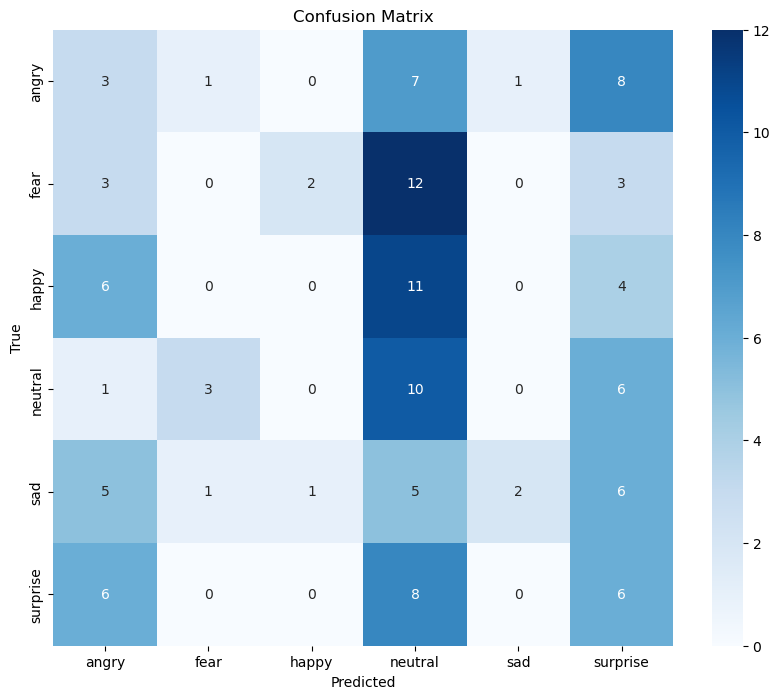

Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.15      0.14        20
        fear       0.00      0.00      0.00        20
       happy       0.00      0.00      0.00        21
     neutral       0.19      0.50      0.27        20
         sad       0.67      0.10      0.17        20
    surprise       0.18      0.30      0.23        20

    accuracy                           0.17       121
   macro avg       0.19      0.18      0.14       121
weighted avg       0.19      0.17      0.13       121



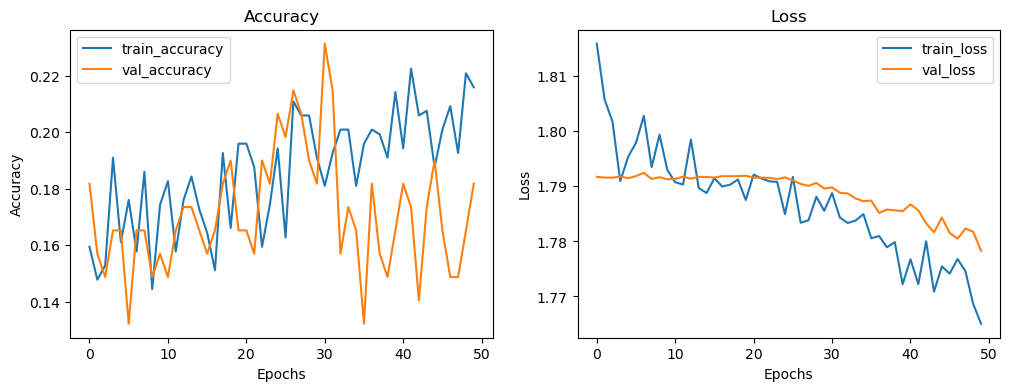

In [11]:

# Define the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Generate predictions on the validation set
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(val_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


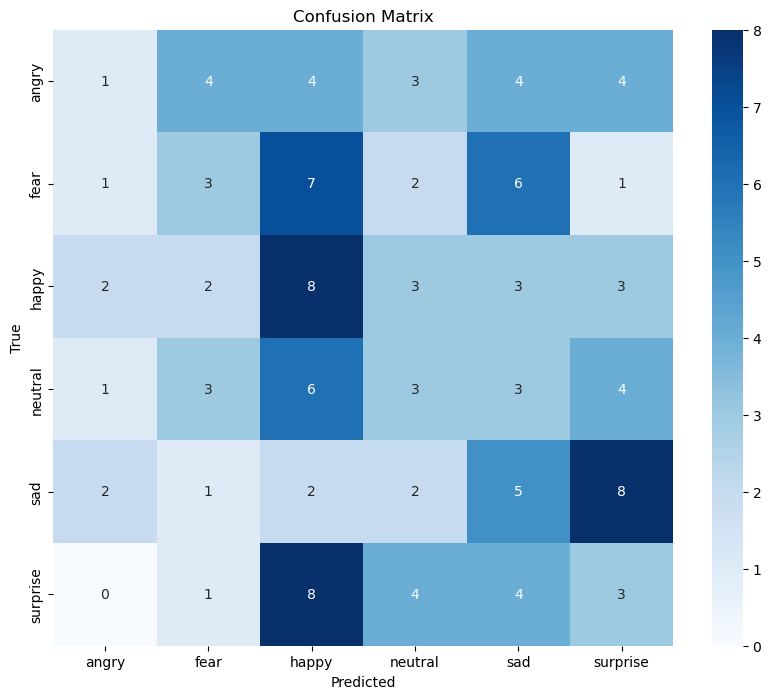

Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.05      0.07        20
        fear       0.21      0.15      0.18        20
       happy       0.23      0.38      0.29        21
     neutral       0.18      0.15      0.16        20
         sad       0.20      0.25      0.22        20
    surprise       0.13      0.15      0.14        20

    accuracy                           0.19       121
   macro avg       0.18      0.19      0.18       121
weighted avg       0.18      0.19      0.18       121



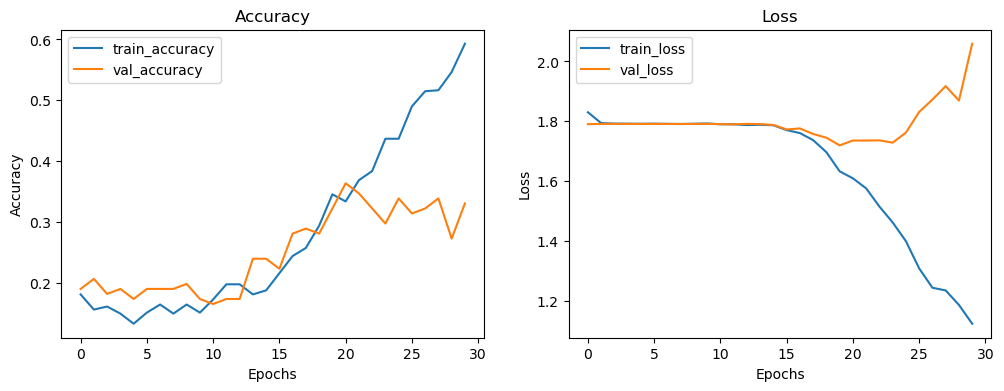

In [6]:

# Generate predictions on the validation set
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(val_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


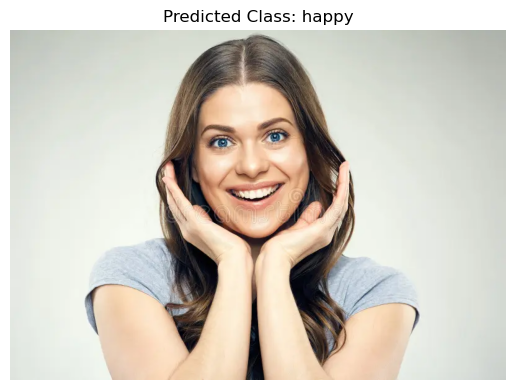

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Scale pixel values
    return img_array

# Path to the image you want to predict
img_path = 'C:/Users/User/Desktop/ai project/dataset/test/ima3.jpg'  # Change this to your image path

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = class_names[predicted_class_index[0]]

# Display the image and predicted class
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()